In [46]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model # model class APi to help visualize convolutional layers

from keras.utils.np_utils import to_categorical
import random


np.random.seed(0)


# Loading Data

(X_train, y_train), (X_test, y_test)= mnist.load_data()
     
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
    

(60000, 28, 28)
(10000, 28, 28)
60000


In [47]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [48]:
# Keeping conditions s that we'll know what went wrong
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

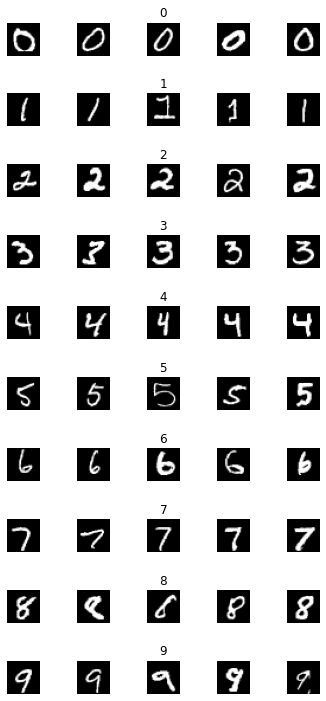

In [49]:
### VISUALIZATION 10 rows 5 cols grid

num_of_samples=[]
     
cols = 5
num_classes = 10
     
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
     
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


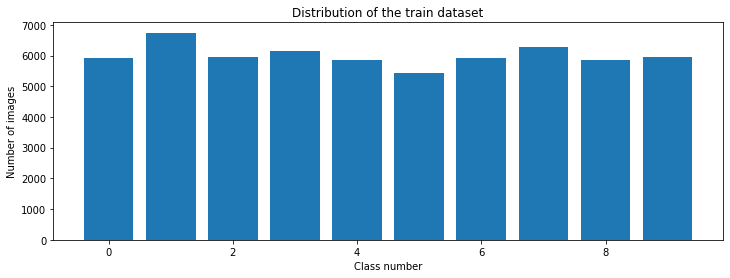

In [50]:
print(num_of_samples)

# plot these no of samples on a par graph to visualize them

plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
     

In [51]:
# Adding a depth of one in the end
### 1 depth is because we have one depth due to gray scale the depth for rgb images is 3

X_train = X_train.reshape(60000, 28, 28, 1) # shape of training data (input)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
### NORMALIZING-    
X_train = X_train/255
X_test = X_test/255

In [52]:
# Creating CNN (we dont flatten the images at this stage) conv architecture oldest - leNet based model

## Creating CNN (we don't flatten the images at this stage) conv We use oldest architecture - leNet based model

In [53]:
#Define lenet model

def leNet_model():

  model = Sequential()

  # First Layer
# every 5x5 filter will have 25 adjustable features as we have 30 filters - 750, more the stride length smaller the feature map
# Every image passed through the first layer of the conv filter is going to create 30 feature maps each one of 24x24 do a depth of 30
  model.add(Conv2D(30, (5,5), input_shape = (28,28,1), activation='relu', strides=1 ))#(conv2d(no of filters,tuple to display size of the hyperparameters, shape of input data, activation fn)) 
  # no of filters increase then no of params increase
  # as the feature map s created we lose info at the borders of the image if we use the stride of one.
  # Same/Half padding(optional parameter) ensures tha the output size remains of the size of input by adding additional layers on the edges so that info is not lost
# In our case the number images are centered so we dont care much about the edges so padding not required
  
  model.add(MaxPooling2D(pool_size=(2,2))) #(MaxPooling2d(tuple of size)) 
  # after our pooling layer the image will gor from a 24x24x 30(depth of conv2d) to 12x12x30
  #as we move forward the size of our layers increase and we start gaining depth

  # Second layer
 # as we are dealing with a more dense input lets reduce the no. of filters for reducing computational power and small filter for small image.
 #Now we are also dealing with a high no of parameters as more layers(30) so no of params = 15x30x3x3 along with bias for each filter (15)= 4065 = 5x layer 1 conv2d param(780)
  model.add(Conv2D(15, (3,3), activation='relu')) # strides set to default
  model.add(MaxPooling2D(pool_size=(2,2)))
  #from 2nd pooling we get 5x5x15 which will be 375 after flattening
  model.add(Flatten())

  # Now flatten data to send it into fully connected layer(MLP)
  # Input layer
  model.add(Dense(500, activation='relu'))
  # Dropout layer
  model.add(Dropout(0.5)) #0,5 recommended

  # output layer
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [54]:
# location of the droout layer also matters as it can be placed between the convolutional layers or btw fully connected layers
# Typically it is placed in between fully connected layers where there is high chance of overfitting

In [55]:
model = leNet_model()
print(model.summary())
# layers in conv layers are much less than ithe ones in the fully connected layers due to weight sharing

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 375)               0         
                                                                 
 dense_4 (Dense)             (None, 500)              

In [56]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 400, verbose = 1, shuffle = 1)


Epoch 1/10
135/135 [==============================] - 2s 10ms/step - loss: 0.2407 - accuracy: 0.9221 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 2/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0691 - accuracy: 0.9789 - val_loss: 0.0397 - val_accuracy: 0.9880
Epoch 3/10
135/135 [==============================] - 1s 9ms/step - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0368 - val_accuracy: 0.9892
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0395 - val_accuracy: 0.9892
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0394 - val_accuracy: 0.9885
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0406 - accuracy: 0.9877 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch

In [57]:
! nvidia-smi

Tue Feb  7 15:01:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    28W /  70W |   1400MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Text(0.5, 0, 'epoch')

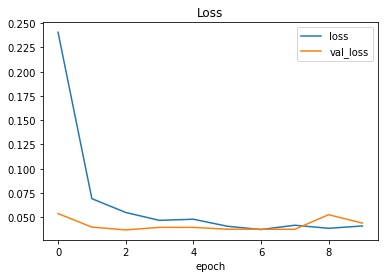

In [58]:
# high accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
     

Text(0.5, 0, 'epoch')

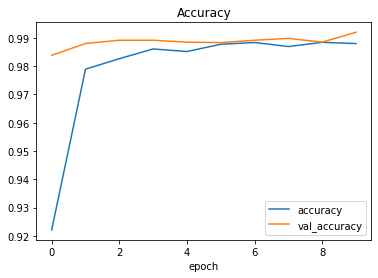

In [59]:
# high val accuracy of 98 percent
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

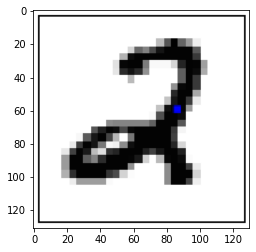

In [60]:
import requests
from PIL import Image
     
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

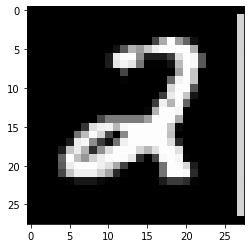

In [61]:
# converting the imported number to the format that we want

import cv2
     
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
     

In [62]:
img = img/255
### Keep in mind tha we are not passsing the flattened image like the MLP model but the one that is of dimensions 28x28x1 
img = img.reshape(1, 28,28,1)

In [63]:
prediction = np.argmax(model.predict(img), axis=-1)

print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 60ms/step
predicted digit: [2]


In [64]:
### FINAL EVALUATION(TEST)
score = model.evaluate(X_test, y_test, verbose=0)# verbose =0 for not displaying the prgresss bar
print(type(score)) # list is provided
print('Test score :', score[0])#score
print('Test accuracy :', score[1]) #accuracy in percentage

<class 'list'>
Test score : 0.03436778485774994
Test accuracy : 0.9914000034332275


## When you compare this model to the feed forward MLP we can see that the losses are pretty low and the accuracy we are able to achieve is consierably high. Also our model is performing well on both training and validation data

## As we can see in the validation error plot that there is overfitting so to minimize this we have to add a specific layer (dropout layer) type that will help reduce overfitting. This works by setting a fraction rate of input units to zero and each update during traininig.

In [65]:
# Some nodes are turned off randomly and after updating again a different set of nodes are tuened off to avoid overfittnig. 

### when test data is used to check performance the nodes that were turned off are used to classif and dropout is tunred off

# when dropout is tuned off during this stage the nodes use their independent learning knowledge for forminhg an even more effeective NN

In [66]:
## by doing this the generalization error is reduced and less overfitting whenn exposed to new data 

### Next step is to visualize what our kernels/filters are seing in code.



In [68]:
#using the Modelclass Api we can log values of model at various sections

layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)#(inputs in your network [0]- 1st layer, the outouts that you want )
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

# run prediction on these layers

visual_layer1 = layer1.predict(img)
visual_layer2 = layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)



1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 43ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


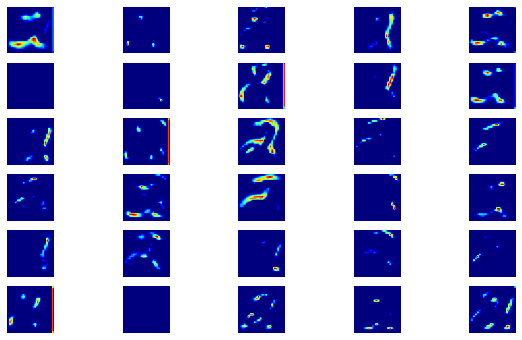

In [70]:
# layer1
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5,i+1) #(rows,cols,each iteration we want preceding image)
  plt.imshow(visual_layer1[0,:,: ,i], cmap=plt.get_cmap('jet')) #(array[first index, pixelx,pixely, no of filters]) (similar to the .shape output)
  plt.axis("off")

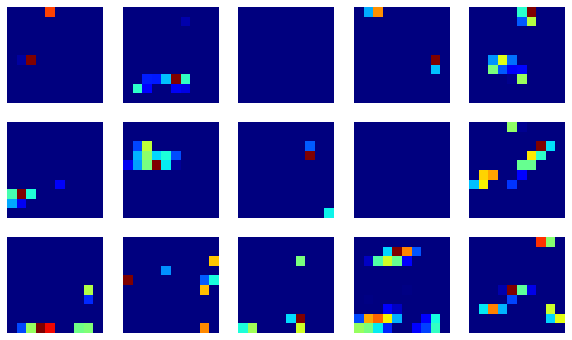

In [71]:
# layer 2
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1) #(rows,cols,each iteration we want preceding image)
  plt.imshow(visual_layer2[0,:,: ,i], cmap=plt.get_cmap('jet')) #(array[first index, pixelx,pixely, no of filters]) (similar to the .shape output)
  plt.axis("off")